In [1]:
import numpy as np
import matplotlib.pyplot as plt
from coffea.hist import plot
from coffea.util import load

In [2]:
x = np.linspace(0,10,11)
y = 2*x
y

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.])

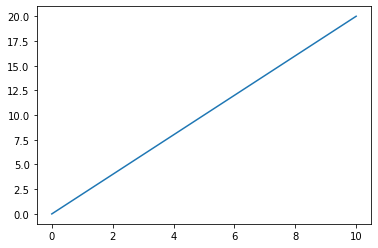

In [3]:
lines = plt.plot(x, y)

In [4]:
data_x, data_y = lines[0].get_data()
data_y

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.])

In [5]:
filename = "/work/mmarcheg/PocketCoffea/output/semileptonic_triggerSF_v46/output.coffea"
output = load(filename)
output

{'sum_genweights': defaultdict_accumulator(float,
                         {'TTTo2L2Nu': 174148058.38684082,
                          'TTToSemiLeptonic': 794553457.9281616}),
 'cutflow': {'Ele32_WPTight_Gsf_pass': defaultdict_accumulator(int,
                          {'DATA': 424,
                           'TTTo2L2Nu': 14781,
                           'TTToSemiLeptonic': 67}),
  'Ele32_WPTight_Gsf_fail': defaultdict_accumulator(int,
                          {'DATA': 230,
                           'TTTo2L2Nu': 6707,
                           'TTToSemiLeptonic': 116}),
  'inclusive': defaultdict_accumulator(int,
                          {'DATA': 654,
                           'TTTo2L2Nu': 21488,
                           'TTToSemiLeptonic': 183}),
  'initial': defaultdict_accumulator(int,
                          {'DATA': 14204024,
                           'TTTo2L2Nu': 2415000,
                           'TTToSemiLeptonic': 2640000}),
  'presel': defaultdict_accumulator(int,

In [6]:
h = output["hist2d_electron_etaSC_vs_electron_pt"]
h

<Hist (sample,cat,year,pt,etaSC) instance at 0x7fcae219a820>

In [7]:
h.identifiers('sample')

[<StringBin (DATA) instance at 0x7fca3400da30>,
 <StringBin (TTTo2L2Nu) instance at 0x7fca33fb5280>,
 <StringBin (TTToSemiLeptonic) instance at 0x7fca33fb5f40>]

In [8]:
datasets = [str(s) for s in h.identifiers('sample')]
datasets_mc = list(filter(lambda x : 'TTTo' in x, datasets))
h_data = h['DATA'].sum('sample', 'year')
h_mc = h[datasets_mc].sum('sample', 'year')
h_mc.values()

{('Ele32_WPTight_Gsf_pass',): array([[2.70108351e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 1.04088945e+02, 0.00000000e+00, 9.58961455e+01],
        [3.47410359e+03, 0.00000000e+00, 5.15409820e+03, 1.52699632e+04,
         1.20134613e+04, 7.07952518e+03, 0.00000000e+00, 3.15142857e+03],
        [2.20527359e+04, 0.00000000e+00, 3.74143725e+04, 6.67715110e+04,
         6.61816969e+04, 3.94128957e+04, 0.00000000e+00, 2.31382045e+04],
        [1.98368388e+04, 0.00000000e+00, 3.55436967e+04, 6.29029518e+04,
         5.36211308e+04, 3.75145905e+04, 0.00000000e+00, 2.20686561e+04],
        [4.80131797e+04, 0.00000000e+00, 9.75236053e+04, 1.62337079e+05,
         1.54619059e+05, 8.83138091e+04, 0.00000000e+00, 4.82777080e+04],
        [2.18799370e+04, 0.00000000e+00, 5.05756473e+04, 9.71516258e+04,
         9.39909044e+04, 4.78294223e+04, 0.00000000e+00, 2.09256574e+04],
        [0.00000000e+00, 0.00000000e+00, 1.12380459e+02, 1.02738306e+02,
         0.00000

In [9]:
categories = [str(s) for s in h.identifiers('cat') if not 'inclusive' in str(s)]
print(categories)
cat = "Ele32_WPTight_Gsf_pass"
eff_mc   = h_mc[cat].sum('cat').values()[()]/h_mc['inclusive'].sum('cat').values()[()]
eff_data = h_data[cat].sum('cat').values()[()]/h_data['inclusive'].sum('cat').values()[()]
sf = eff_data/eff_mc
sf = np.nan_to_num(np.where(~np.isinf(sf), sf, np.nan))
sf

['Ele32_WPTight_Gsf_fail', 'Ele32_WPTight_Gsf_pass']


/tmp/ipykernel_13199/2388421090.py:4: RuntimeWarning: invalid value encountered in true_divide
  eff_mc   = h_mc[cat].sum('cat').values()[()]/h_mc['inclusive'].sum('cat').values()[()]
/tmp/ipykernel_13199/2388421090.py:5: RuntimeWarning: invalid value encountered in true_divide
  eff_data = h_data[cat].sum('cat').values()[()]/h_data['inclusive'].sum('cat').values()[()]
/tmp/ipykernel_13199/2388421090.py:6: RuntimeWarning: divide by zero encountered in true_divide
  sf = eff_data/eff_mc
/tmp/ipykernel_13199/2388421090.py:6: RuntimeWarning: invalid value encountered in true_divide
  sf = eff_data/eff_mc


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.85665654, 1.14129992,
        0.8469434 , 0.        , 1.51079951],
       [0.98374208, 0.        , 0.91476465, 0.94925273, 0.9714937 ,
        0.667803  , 0.        , 0.97949771],
       [1.02366303, 0.        , 0.87990221, 1.00417695, 1.02571902,
        0.88252242, 0.        , 1.03191909],
       [1.03110584, 0.        , 0.87012704, 1.02096629, 0.95412562,
        0.99123186, 0.        , 1.14420261],
       [1.04569513, 0.        , 1.0676928 , 1.063822  , 0.96785539,
        1.08709261, 0.        , 0.63746395],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        ]])

In [10]:
axis_pt = h.axes()[-2]
axis_eta = h.axes()[-1]
axis_eta.edges()

array([-2.5   , -1.566 , -1.4442, -0.8   ,  0.    ,  0.8   ,  1.4442,
        1.566 ,  2.5   ])

In [11]:
binwidth_pt = np.ediff1d(axis_pt.edges())
binwidth_eta = np.ediff1d(axis_eta.edges())

bincenter_pt = axis_pt.edges()[:-1] + 0.5*binwidth_pt
bincenter_eta = axis_eta.edges()[:-1] + 0.5*binwidth_eta
bincenter_eta

array([-2.033 , -1.5051, -1.1221, -0.4   ,  0.4   ,  1.1221,  1.5051,
        2.033 ])

In [12]:
eta, pt = np.meshgrid(bincenter_eta, bincenter_pt)
pt.shape

(7, 8)

In [13]:
sf.shape

(7, 8)

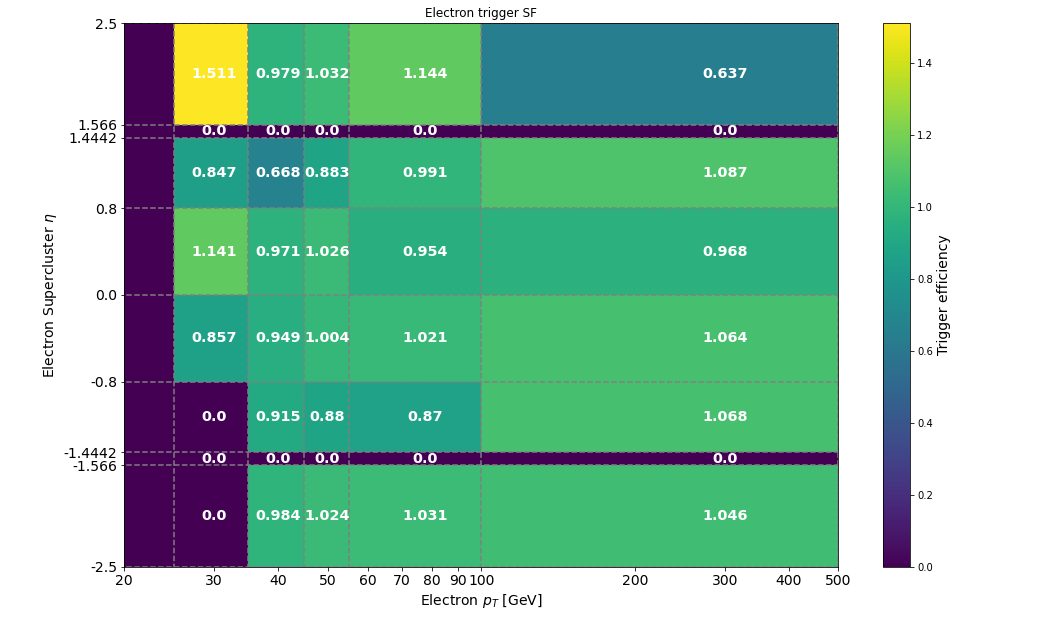

In [14]:
fontsize=14

fig, ax = plt.subplots(figsize=[16,10])
hist, xbins, ybins, im = plt.hist2d(pt.flatten(), eta.flatten(), weights=sf.flatten(), bins=(axis_pt.edges(), axis_eta.edges()))
plt.xlim(0, 500)
plt.xlabel(axis_pt.label, fontsize=fontsize)
plt.ylabel(axis_eta.label, fontsize=fontsize)
plt.xscale('log')
plt.xlim(20, 500)
xticks = [20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500]
yticks = axis_eta.edges()
plt.xticks(xticks, [str(t) for t in xticks], fontsize=fontsize)
plt.yticks(yticks, [str(t) for t in yticks], fontsize=fontsize)
plt.hlines(axis_eta.edges(), axis_pt.edges()[-1], axis_pt.edges()[0], linestyle='--', color='gray')
plt.vlines(axis_pt.edges(), axis_eta.edges()[-1], axis_eta.edges()[0], linestyle='--', color='gray')

for (i, x) in enumerate(bincenter_pt):
    for (j, y) in enumerate(bincenter_eta):
        ax.text(x, y, round(sf[i][j], 3), 
                color="w", ha="center", va="center", fontsize="x-large", fontweight="bold")

plt.title("Electron trigger SF")
cbar = plt.colorbar();
#cbar.set_ticklabels(cbar.ax.get_yticklabels(), fontsize=fontsize)
cbar.set_label("Trigger efficiency", fontsize=fontsize)

In [15]:
output['trigger_efficiency']['Ele32_WPTight_Gsf_pass']

{'mc': 0.677650252284618, 'data': 0.6483180428134556, 'sf': 0.9567148254246608}

<Hist (sample,cat,year,pt) instance at 0x7fcae217b5e0>

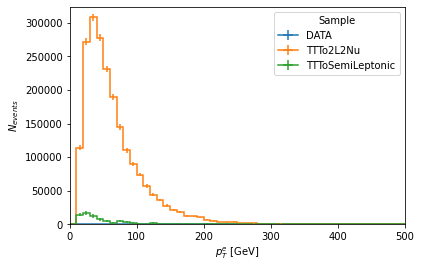

In [17]:
h_ele_pt = output['hist_electron_pt']
datasets = ['DATA'] + datasets_mc
ax = plot.plot1d(h_ele_pt[(datasets, 'inclusive','2018')].sum('cat', 'year'))
#ax.set_yscale('log')
ax.set_xlim(0, 500)
#ax.set_ylim(0.01, 10**6)
h_ele_pt

In [18]:
x = np.array([1,3,5,7,4,2,0.4])
np.quantile(x, np.arange(0.2,1,0.2))

array([1.2, 2.4, 3.6, 4.8])

In [19]:
np.arange(0.2,1,0.2)

array([0.2, 0.4, 0.6, 0.8])

In [20]:
np.cumsum(x)

array([ 1. ,  4. ,  9. , 16. , 20. , 22. , 22.4])

In [21]:
np.cumsum(x)/sum(x)

array([0.04464286, 0.17857143, 0.40178571, 0.71428571, 0.89285714,
       0.98214286, 1.        ])

In [22]:
len(x)*np.cumsum(x)/sum(x)

array([0.3125, 1.25  , 2.8125, 5.    , 6.25  , 6.875 , 7.    ])

In [23]:
x = h_ele_pt[(datasets, 'inclusive','2018')].sum('cat', 'year').values()[('TTTo2L2Nu',)]
x

array([0.00000000e+00, 1.14271552e+05, 2.71761817e+05, 3.08311405e+05,
       2.77948264e+05, 2.31152998e+05, 1.89043890e+05, 1.45053198e+05,
       1.10076745e+05, 8.97509542e+04, 7.41856293e+04, 5.72752048e+04,
       4.40776172e+04, 3.64918269e+04, 2.78711343e+04, 2.18157876e+04,
       1.80033972e+04, 1.28620978e+04, 1.17785123e+04, 1.04312094e+04,
       6.97807910e+03, 5.34115591e+03, 3.51440145e+03, 3.19648481e+03,
       3.75370876e+03, 2.21971267e+03, 1.78680917e+03, 1.36948275e+03,
       7.00426718e+02, 7.19756930e+02, 8.27591786e+02, 1.26719310e+03,
       5.30460308e+02, 1.02750167e+02, 3.05007183e+02, 5.92240335e+02,
       6.49493990e+02, 3.08352600e+02, 1.00950946e+02, 3.19678912e+02,
       1.00001914e+02, 1.20003339e+02, 1.02451580e+02, 3.20245886e+02,
       1.00937531e+02, 0.00000000e+00, 1.00990727e+02, 0.00000000e+00,
       0.00000000e+00, 8.39620216e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.12380459e+02, 0.00000000e+00,
      

<Hist (sample,cat,year,eta) instance at 0x7fcae217ba60>

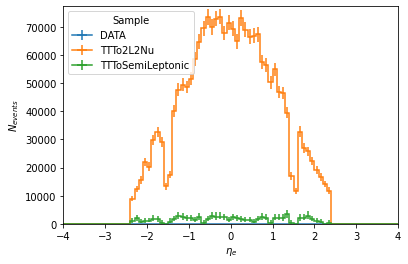

In [24]:
h_ele_eta = output['hist_electron_eta']
datasets = ['DATA'] + datasets_mc
ax = plot.plot1d(h_ele_eta[(datasets, 'inclusive','2018')].sum('cat', 'year'))
#ax.set_yscale('log')
#ax.set_xlim(0, 500)
#ax.set_ylim(0.01, 10**6)
h_ele_eta

In [25]:
x = np.array([1, 3, 7, 10])
np.ediff1d(x)

array([2, 4, 3])

In [30]:
h[(datasets_mc, 'inclusive', '2018')].values()

{('TTTo2L2Nu',
  'inclusive',
  '2018'): array([[2.90677944e+04, 0.00000000e+00, 3.43261452e+04, 6.07240638e+04,
         6.26321406e+04, 3.45617124e+04, 0.00000000e+00, 2.56504863e+04],
        [3.04543031e+04, 0.00000000e+00, 4.10632628e+04, 7.96853485e+04,
         7.20621248e+04, 4.34240066e+04, 0.00000000e+00, 2.74009202e+04],
        [2.76804010e+04, 0.00000000e+00, 4.37910415e+04, 7.58228218e+04,
         7.66374919e+04, 4.58396944e+04, 0.00000000e+00, 2.78860328e+04],
        [2.17537950e+04, 0.00000000e+00, 4.02626014e+04, 6.90580297e+04,
         6.07897099e+04, 4.13553635e+04, 0.00000000e+00, 2.45467125e+04],
        [5.23527649e+04, 0.00000000e+00, 1.03360112e+05, 1.72413259e+05,
         1.63428692e+05, 9.58100201e+04, 0.00000000e+00, 5.35299702e+04],
        [2.24936351e+04, 0.00000000e+00, 5.35941209e+04, 1.02144555e+05,
         9.91712969e+04, 5.11770623e+04, 0.00000000e+00, 2.17240766e+04],
        [0.00000000e+00, 0.00000000e+00, 1.12380459e+02, 1.02738306e+02,
     